# Predicting House Prices Assignment

In [1]:
import pandas as pd
import numpy as np

In [2]:
homes = pd.read_csv("home_data.csv")
homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1. Selection and summary statistics: In the notebook we covered in the module, we discovered which neighborhood (zip code) of Seattle had the highest average house sale price. 

__Now, take the sales data, select only the houses with this zip code, and compute the average price.__

In [3]:
highest_price_zip = homes.groupby("zipcode").agg({"price": np.average})["price"].argmax()
zip_avg_price = homes[homes["zipcode"] == highest_price_zip].loc[:, "price"].mean()
zip_avg_price

2160606.6

2. Filtering data: One of the key features we used in our model was the number of square feet of living space (‘sqft_living’) in the house. For this part, we are going to use the idea of filtering (selecting) data.

In particular, we are going to use logical filters to select rows of an SFrame. Using such filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft. 

__What fraction of the all houses have ‘sqft_living’ in this range?__

In [4]:
btw_2k_4k = homes.where((homes["sqft_living"] > 2000) & (homes["sqft_living"] <= 4000)).dropna()
len(btw_2k_4k) / len(homes)

0.42187572294452413

3. Building a regression model with several more features: In the sample notebook, we built two regression models to predict house prices, one using just ‘sqft_living’ and the other one using a few more features, we called this set

``` python
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
```

Now, going back to the original dataset, you will build a model using the following features:

```python
advanced_features = 
[
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
```

Compute the RMSE (root mean squared error) on the test_data for the model using just my_features, and for the one using advanced_features.

Note 1: both models must be trained on the original sales dataset, not the filtered one.

Note 2: when doing the train-test split, make sure you use seed=0, so you get the same training and test sets, and thus results, as we do.

__What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?__

## Split data into training and testing sets

In [68]:
homes_X = homes.drop(["price"], axis = 1)
homes_y = homes["price"]

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(homes_X, homes_y, test_size=0.2, random_state=27)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 20) (17290,)
(4323, 20) (4323,)


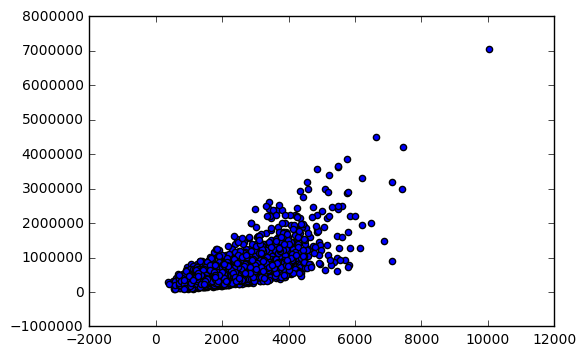

In [87]:
% matplotlib inline
import matplotlib.pyplot as plt

#plt.scatter(X_train["sqft_living"], y_train)
plt.scatter(X_test["sqft_living"], y_test)
plt.show()

## Fit `my_features` model

In [88]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [89]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train[my_features], y_train)
predictions = lr.predict(X_test[my_features])

lr.coef_

array([ -5.42793801e+04,   1.01515651e+04,   3.12815388e+02,
        -3.11641295e-01,  -4.25517812e+03,   5.58008373e+02])

## Evaluate `my_features` model

In [90]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
rmse

266506.77443101484

## Fit `advanced_features` model

In [91]:
advanced_features = \
[
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house                
'grade', # measure of quality of construction                
'waterfront', # waterfront property                
'view', # type of view                
'sqft_above', # square feet above ground                
'sqft_basement', # square feet in basement                
'yr_built', # the year built                
'yr_renovated', # the year renovated                
'lat', 'long', # the lat-long of the parcel                
'sqft_living15', # average sq.ft. of 15 nearest neighbors                 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [92]:
lr2 = LinearRegression()
lr2.fit(X_train[advanced_features], y_train)
predictions2 = lr2.predict(X_test[advanced_features])

lr2.coef_

array([ -3.36280595e+04,   3.76186648e+04,   1.08875262e+02,
         1.01816692e-01,   7.97546227e+03,  -5.85088874e+02,
         2.62524350e+04,   9.64086258e+04,   5.52918408e+05,
         5.51710801e+04,   6.80512356e+01,   4.08240265e+01,
        -2.55395094e+03,   2.09949955e+01,   6.03311127e+05,
        -2.13750909e+05,   2.22107708e+01,  -3.35703851e-01])

## Evaluate `advanced_features` model

In [93]:
mse2 = mean_squared_error(y_test, predictions2)
rmse2 = mse2 ** 0.5
rmse2

212208.02331207914

## RMSE difference between `my_features` and `advanced_features`

In [94]:
rmse - rmse2

54298.751118935703

In [84]:
print(rmse, rmse2)

244004.774431 190473.37571
